In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 47kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

### Feature Processing
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from dateutil import relativedelta
from sklearn.preprocessing import LabelEncoder

### Feature Selection Techniques
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold

### Train Test Split
from sklearn.model_selection import train_test_split

### Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import  XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

### Metrics
import sklearn.metrics as metrics

### Hyper Paramter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and Saving Model
import pickle

### Ensemble Technique - Combining Multiple models
## We call the algorithms like this way

## Then we use Voting Classifier for ensemble learning:
from sklearn.ensemble import VotingClassifier

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

from keras import backend as K
import re

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/train_bur_demo_median_updated_string_manipulation_f.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_bur_demo_median_updated_string_manipulation.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

### Identifying unique values 

In [ ]:
tr = train_dataset['ZiPCODE'].value_counts().to_frame().reset_index().sort_values('index')
tr

In [ ]:
te =test_dataset['ZiPCODE'].value_counts().to_frame().reset_index().sort_values('index').reset_index()
te

In [ ]:
m = tr['index'].to_list()
m

In [ ]:
te['D'] = te['index'].apply(lambda x: 1 if x in m else 0)
te

In [ ]:
len(te)

In [ ]:
len(te[te['D']==0])

### Training on Main Imp features

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
train_dataset = train_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
train_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


In [ ]:
train_dataset.shape

(128654, 48)

In [ ]:
test_dataset = test_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
test_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
test_dataset.shape

(14745, 47)

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 47), (128654,))

In [ ]:
display(X.head())
display(test_dataset.head())

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
X.shape,y.shape

((128654, 47), (128654,))

In [ ]:
test_dataset.shape

(14745, 47)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 47) (25731, 47) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
estimators_st = {
    'Logistic Regression': [LogisticRegression()],
    'KNN' :[KNeighborsClassifier()],
    'Decision Tree' :[DecisionTreeClassifier()],
    'Random Forest' :[RandomForestClassifier()],
    'Gradient Boosting':[GradientBoostingClassifier()],
    'XG Boost': [XGBClassifier()],
    'LGBM':[LGBMClassifier()],
    'Cat Boost':[CatBoostClassifier(verbose=0, n_estimators=1000)],
}

#writing a function to fit models above to the train dataset
def mfit(estimators_st, X_train, y_train):
    for m in estimators_st:
        estimators_st[m][0].fit(X_train, y_train)
        print(m+' fitted')

mfit(estimators_st, X_train_st, y_train)

def mpredict(estimators_st, X_test_st, y_test):
    outcome = dict()
    for m in estimators_st:
        y_pred = estimators_st[m][0].predict(X_test_st)
        outcome[m] = [metrics.f1_score(y_test,y_pred,average='macro'),
                      metrics.accuracy_score(y_test,y_pred),
                      metrics.classification_report(y_test,y_pred)]
    return outcome


outcome_st = mpredict(estimators_st, X_test_st, y_test)

for m in outcome_st:
    print('------------------------'+m+'------------------------')
    print('F1 Score', round(outcome_st[m][0],4))
    print('Accuracy Score', round(outcome_st[m][1],4))
    print('Classification report \n ')
    print(outcome_st[m][2])
    print('\n')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression fitted
KNN fitted
Decision Tree fitted
Random Forest fitted
Gradient Boosting fitted
XG Boost fitted
LGBM fitted
Cat Boost fitted
------------------------Logistic Regression------------------------
F1 Score 0.1741
Accuracy Score 0.8283
Classification report 
 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     21279
           1       0.46      0.11      0.18      1642
           2       0.05      0.00      0.00       761
           3       0.24      0.02      0.05       683
           4       0.56      0.01      0.01       663
           5       0.37      0.04      0.07       502
           6       0.00      0.00      0.00       201

    accuracy                           0.83     25731
   macro avg       0.36      0.17      0.17     25731
weighted avg       0.75      0.83      0.77     25731



------------------------KNN------------------------
F1 Score 0.2062
Accuracy Score 0.8213
Classification report 
 
     

In [ ]:
X.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


In [ ]:
X.shape

(128654, 47)

In [ ]:
test_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
test_dataset.shape

(14745, 47)

In [ ]:
display(X.head())
display(test_dataset.head())

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
X.shape,y.shape,test_dataset.shape

((128654, 47), (128654,), (14745, 47))

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_dataset)

In [ ]:
model_rf_final_submit = LGBMClassifier()

#model_rf_final_submit = RandomForestClassifier()
model_rf_final_submit = model_rf_final_submit.fit(X_st,y)

y_pred = model_rf_final_submit.predict(test_final_st)
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No Top-up Service    14234
 > 48 Months           405
24-30 Months            35
36-48 Months            23
30-36 Months            22
18-24 Months            19
12-18 Months             7
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_rf_updated_final_train1_FINAL.csv',index=False)

Handling Imbalanced Dataset 

In [ ]:
X.shape , y.shape

((128654, 47), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 47) (25731, 47) (102923,) (25731,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=0, n=85397 (14.286%)
Class=4, n=85397 (14.286%)
Class=1, n=85397 (14.286%)
Class=5, n=85397 (14.286%)
Class=2, n=85397 (14.286%)
Class=3, n=85397 (14.286%)
Class=6, n=85397 (14.286%)


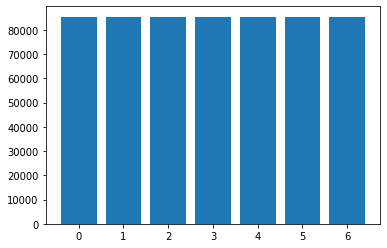

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
for k,v in counter.items():
	per = v / len(y_train_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.33099953568247614
Accuracy Score 0.8287668570984416
Classification report 
 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21279
           1       0.48      0.31      0.38      1642
           2       0.22      0.06      0.09       761
           3       0.30      0.25      0.27       683
           4       0.37      0.19      0.25       663
           5       0.33      0.24      0.28       502
           6       0.28      0.09      0.14       201

    accuracy                           0.83     25731
   macro avg       0.41      0.30      0.33     25731
weighted avg       0.79      0.83      0.80     25731





In [ ]:
model_rf_final = LGBMClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3377903913286605
Accuracy Score 0.8305934475923983
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     21279
           1       0.54      0.27      0.36      1642
           2       0.28      0.09      0.13       761
           3       0.37      0.21      0.27       683
           4       0.40      0.18      0.25       663
           5       0.34      0.25      0.28       502
           6       0.14      0.18      0.16       201

    accuracy                           0.83     25731
   macro avg       0.42      0.30      0.34     25731
weighted avg       0.79      0.83      0.80     25731





In [ ]:
X.shape, y.shape

((128654, 47), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 47) (25731, 47) (102923,) (25731,)


Class=0, n=85397 (82.972%)
Class=4, n=2399 (2.331%)
Class=1, n=6724 (6.533%)
Class=5, n=1866 (1.813%)
Class=2, n=2895 (2.813%)
Class=3, n=2809 (2.729%)
Class=6, n=833 (0.809%)


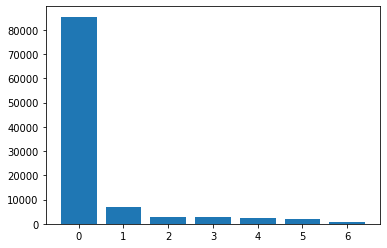

In [ ]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=0, n=85397 (18.549%)
Class=4, n=62000 (13.467%)
Class=1, n=65000 (14.118%)
Class=5, n=64000 (13.901%)
Class=2, n=60000 (13.032%)
Class=3, n=61000 (13.249%)
Class=6, n=63000 (13.684%)


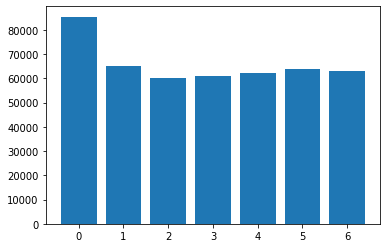

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
strategy = {0:85397, 1:65000, 2:60000, 3:61000, 4:62000, 5:64000,6:63000}
oversample = SMOTE(sampling_strategy=strategy)
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
for k,v in counter.items():
	per = v / len(y_train_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
X_train_os.shape

(460397, 47)

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.32881679444305734
Accuracy Score 0.8336248105398157
Classification report 
 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     21279
           1       0.49      0.30      0.37      1642
           2       0.26      0.05      0.08       761
           3       0.34      0.24      0.28       683
           4       0.39      0.18      0.25       663
           5       0.36      0.23      0.28       502
           6       0.25      0.08      0.12       201

    accuracy                           0.83     25731
   macro avg       0.42      0.29      0.33     25731
weighted avg       0.79      0.83      0.81     25731





Value Count

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_only_value_count_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_only_value_count_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,5,9,4,3140,5,13,2,95479,5,26367,1,9,104533,3,5,16610,0.0,125115.50,615.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,12,13,7,1961,4,1,2,95479,7,13997,2,9,14151,2,7,47116,0.0,334547.50,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,29,31,8,13746,8,1,5,6842,13,26,3,26,7053,3,19,16610,0.0,30303.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,2,4,2,80864,3,661,1,95479,4,68493,1,4,104533,2,2,47116,0.0,195207.75,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,6,7,3,80864,4,50,3,95479,4,11477,3,3,7053,4,3,10,0.0,172109.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,3,4,4,80864,1,2,3,362,2,9,2,2,15784,2,3,47116,0.0,132597.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,7,8,5,13746,3,4,4,95479,3,16,2,6,15784,2,6,47116,0.0,98453.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,10,12,4,3140,7,23,2,95479,11,13997,3,6,7053,2,11,47116,0.0,22018.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,2,2,13554,1,7102,2,95479,1,26367,1,2,104533,2,1,47116,0.0,139003.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,2,2,3140,1,3332,1,95479,2,68493,2,1,14151,2,1,47116,0.0,254296.0,0.0,265000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(128654, 65) (14745, 64)


In [ ]:
train_dataset = train_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
train_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,5,9,4,3140,5,2,95479,5,26367,1,9,104533,3,5,16610,0.0,125115.50,615.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,12,13,7,1961,4,2,95479,7,13997,2,9,14151,2,7,47116,0.0,334547.50,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,29,31,8,13746,8,5,6842,13,26,3,26,7053,3,19,16610,0.0,30303.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,2,4,2,80864,3,1,95479,4,68493,1,4,104533,2,2,47116,0.0,195207.75,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,6,7,3,80864,4,3,95479,4,11477,3,3,7053,4,3,10,0.0,172109.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_dataset.shape

(128654, 60)

In [ ]:
test_dataset = test_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
test_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,3,4,4,80864,1,3,362,2,9,2,2,15784,2,3,47116,0.0,132597.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,7,8,5,13746,3,4,95479,3,16,2,6,15784,2,6,47116,0.0,98453.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,10,12,4,3140,7,2,95479,11,13997,3,6,7053,2,11,47116,0.0,22018.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,2,2,13554,1,2,95479,1,26367,1,2,104533,2,1,47116,0.0,139003.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,2,2,3140,1,1,95479,2,68493,2,1,14151,2,1,47116,0.0,254296.0,0.0,265000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dataset.shape

(14745, 59)

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 59), (128654,))

In [ ]:
display(X.head())
display(test_dataset.head())

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,5,9,4,3140,5,2,95479,5,26367,1,9,104533,3,5,16610,0.0,125115.50,615.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,12,13,7,1961,4,2,95479,7,13997,2,9,14151,2,7,47116,0.0,334547.50,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,29,31,8,13746,8,5,6842,13,26,3,26,7053,3,19,16610,0.0,30303.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,2,4,2,80864,3,1,95479,4,68493,1,4,104533,2,2,47116,0.0,195207.75,0.0,0.0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,6,7,3,80864,4,3,95479,4,11477,3,3,7053,4,3,10,0.0,172109.00,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value_freq,MATCH-TYPE_Top_value_freq,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median,SELF-INDICATOR_Top_value_True,SELF-INDICATOR_unique_values_True,SELF-INDICATOR_unique_values_True False,MATCH-TYPE_Top_value_SECONDARY,MATCH-TYPE_unique_values_PRIMARY SECONDARY,MATCH-TYPE_unique_values_SECONDARY,OWNERSHIP-IND_Top_value_Individual,OWNERSHIP-IND_Top_value_Joint,OWNERSHIP-IND_Top_value_Primary,OWNERSHIP-IND_Top_value_Supl Card Holder,ACCOUNT-STATUS_Top_value_Closed,ACCOUNT-STATUS_Top_value_Delinquent,ACCOUNT-STATUS_Top_value_Restructured,ACCOUNT-STATUS_Top_value_SUIT FILED (WILFUL DEFAULT),ACCOUNT-STATUS_Top_value_Settled,ACCOUNT-STATUS_Top_value_Suit Filed,ACCOUNT-STATUS_Top_value_WILFUL DEFAULT,ACCOUNT-STATUS_Top_value_Written Off
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,3,4,4,80864,1,3,362,2,9,2,2,15784,2,3,47116,0.0,132597.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,7,8,5,13746,3,4,95479,3,16,2,6,15784,2,6,47116,0.0,98453.5,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,10,12,4,3140,7,2,95479,11,13997,3,6,7053,2,11,47116,0.0,22018.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,2,2,13554,1,2,95479,1,26367,1,2,104533,2,1,47116,0.0,139003.0,0.0,0.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,2,2,3140,1,1,95479,2,68493,2,1,14151,2,1,47116,0.0,254296.0,0.0,265000.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape,y.shape

((128654, 59), (128654,))

In [ ]:
test_dataset.shape

(14745, 59)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 59) (25731, 59) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = LGBMClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3228021699164456
Accuracy Score 0.8481986708639384
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     21279
           1       0.61      0.30      0.40      1642
           2       0.42      0.04      0.08       761
           3       0.53      0.18      0.27       683
           4       0.55      0.13      0.21       663
           5       0.46      0.16      0.24       502
           6       0.32      0.08      0.13       201

    accuracy                           0.85     25731
   macro avg       0.54      0.27      0.32     25731
weighted avg       0.81      0.85      0.81     25731





In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = LGBMClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3228021699164456
Accuracy Score 0.8481986708639384
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     21279
           1       0.61      0.30      0.40      1642
           2       0.42      0.04      0.08       761
           3       0.53      0.18      0.27       683
           4       0.55      0.13      0.21       663
           5       0.46      0.16      0.24       502
           6       0.32      0.08      0.13       201

    accuracy                           0.85     25731
   macro avg       0.54      0.27      0.32     25731
weighted avg       0.81      0.85      0.81     25731





In [ ]:
X.shape

(128654, 59)

In [ ]:
test_dataset.shape

(14745, 59)

In [ ]:
y.shape

(128654,)

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_dataset)
model_rf_final_submit = RandomForestClassifier()

#model_rf_final_submit = RandomForestClassifier()
model_rf_final_submit = model_rf_final_submit.fit(X_st,y)
y_pred = model_rf_final_submit.predict(test_final_st)
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No Top-up Service    14502
 > 48 Months           211
30-36 Months            12
24-30 Months            11
36-48 Months             6
18-24 Months             2
12-18 Months             1
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_rf_updated_final_train2.csv',index=False)

RF


In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
train_dataset = train_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values','PaymentMode'
,'State','ACCOUNT-STATUS_Top_value_freq','ACCT-TYPE_Top_value_freq',
 'CONTRIBUTOR-TYPE_Top_value_freq',
 'MATCH-TYPE_Top_value_freq',
 'MATCH-TYPE_unique_values',
 'OWNERSHIP-IND_Top_value_freq',
 'OWNERSHIP-IND_unique_values',
 'SELF-INDICATOR_Top_value_freq'],axis=1)
train_dataset.head()

,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,48,450000,275000.0,24000.0,49,35833.33,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,1,1,4,7,2,1,2,1,1,3,1,4,0.0,125115.50,615.0,0.0
1,47,485000,350000.0,10500.0,23,666.67,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,1,1,7,10,2,1,3,2,1,2,2,1,0.0,334547.50,0.0,0.0
2,68,690000,519728.0,38300.0,39,45257.00,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,1,1,8,2,5,3,55,3,1,3,1,4,0.0,30303.00,0.0,0.0
3,48,480000,400000.0,11600.0,24,20833.33,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,1,1,2,1,1,1,1,1,1,2,1,1,0.0,195207.75,0.0,0.0
4,44,619265,440000.0,15000.0,56,27313.67,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,1,1,3,1,3,1,4,3,1,4,2,45,0.0,172109.00,0.0,0.0


In [ ]:
test_dataset = test_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values','PaymentMode'
,'State','ACCOUNT-STATUS_Top_value_freq','ACCT-TYPE_Top_value_freq',
 'CONTRIBUTOR-TYPE_Top_value_freq',
 'MATCH-TYPE_Top_value_freq',
 'MATCH-TYPE_unique_values',
 'OWNERSHIP-IND_Top_value_freq',
 'OWNERSHIP-IND_unique_values',
 'SELF-INDICATOR_Top_value_freq'],axis=1)
test_dataset.head()

,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,46,480000,365000.0,1000.0,50,32069.00,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,1,1,4,1,3,6,79,2,1,2,2,1,0.0,132597.5,0.0,0.0
1,45,480000,285000.0,9300.0,35,25000.00,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,1,1,5,2,4,1,64,2,1,2,1,1,0.0,98453.5,0.0,0.0
2,48,580000,400000.0,35800.0,37,23333.33,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,1,1,4,7,2,1,3,3,1,2,1,1,0.0,22018.0,0.0,0.0
3,36,725000,500000.0,52000.0,55,91666.67,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,2,3,2,1,2,1,1,2,2,1,0.0,139003.0,0.0,0.0
4,48,617000,400000.0,35400.0,48,12500.00,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,2,7,1,1,1,2,2,2,2,1,0.0,254296.0,0.0,265000.0


In [ ]:
train_dataset.shape , test_dataset.shape

((128654, 38), (14745, 37))

In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 37), (128654,))

In [ ]:
display(X.head())
display(test_dataset.head())

,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,48,450000,275000.0,24000.0,49,35833.33,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,1,1,4,7,2,1,2,1,1,3,1,4,0.0,125115.50,615.0,0.0
1,47,485000,350000.0,10500.0,23,666.67,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,1,1,7,10,2,1,3,2,1,2,2,1,0.0,334547.50,0.0,0.0
2,68,690000,519728.0,38300.0,39,45257.00,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,1,1,8,2,5,3,55,3,1,3,1,4,0.0,30303.00,0.0,0.0
3,48,480000,400000.0,11600.0,24,20833.33,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,1,1,2,1,1,1,1,1,1,2,1,1,0.0,195207.75,0.0,0.0
4,44,619265,440000.0,15000.0,56,27313.67,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,1,1,3,1,3,1,4,3,1,4,2,45,0.0,172109.00,0.0,0.0


,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,46,480000,365000.0,1000.0,50,32069.00,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,1,1,4,1,3,6,79,2,1,2,2,1,0.0,132597.5,0.0,0.0
1,45,480000,285000.0,9300.0,35,25000.00,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,1,1,5,2,4,1,64,2,1,2,1,1,0.0,98453.5,0.0,0.0
2,48,580000,400000.0,35800.0,37,23333.33,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,1,1,4,7,2,1,3,3,1,2,1,1,0.0,22018.0,0.0,0.0
3,36,725000,500000.0,52000.0,55,91666.67,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,2,3,2,1,2,1,1,2,2,1,0.0,139003.0,0.0,0.0
4,48,617000,400000.0,35400.0,48,12500.00,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,2,7,1,1,1,2,2,2,2,1,0.0,254296.0,0.0,265000.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 37) (25731, 37) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.258951736698383
Accuracy Score 0.8433795810500953
Classification report 
 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     21279
           1       0.61      0.21      0.31      1642
           2       0.40      0.02      0.04       761
           3       0.59      0.12      0.21       683
           4       0.61      0.09      0.16       663
           5       0.60      0.09      0.16       502
           6       0.25      0.01      0.03       201

    accuracy                           0.84     25731
   macro avg       0.56      0.22      0.26     25731
weighted avg       0.80      0.84      0.79     25731





In [ ]:
X.shape , test_dataset.shape

((128654, 37), (14745, 37))

In [ ]:
sc = StandardScaler()
X_st = sc.fit_transform(X)
test_final_st = sc.transform(test_dataset)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_st,y)

y_pred = model_rf_final.predict(test_final_st)
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No Top-up Service    14507
 > 48 Months           208
36-48 Months            10
24-30 Months             8
30-36 Months             8
18-24 Months             4
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_rf_updated_final_train3.csv',index=False)

In [ ]:
X.shape

(128654, 37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 37) (25731, 37) (102923,) (25731,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=0, n=85397 (14.286%)
Class=4, n=85397 (14.286%)
Class=1, n=85397 (14.286%)
Class=5, n=85397 (14.286%)
Class=2, n=85397 (14.286%)
Class=3, n=85397 (14.286%)
Class=6, n=85397 (14.286%)


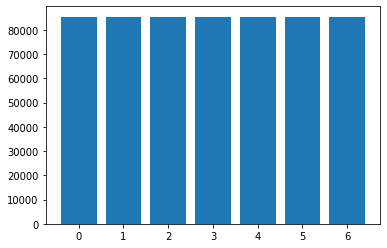

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_train_os)
for k,v in counter.items():
	per = v / len(y_train_os) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train_os)
X_test_st = sc.transform(X_test)

In [ ]:
model_rf_final = RandomForestClassifier()
model_rf_final = model_rf_final.fit(X_train_st,y_train_os)

y_pred = model_rf_final.predict(X_test_st)
print('------------------------RF MODEL------------------------')
print('F1 Score', metrics.f1_score(y_test,y_pred,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred))
print('\n')

------------------------RF MODEL------------------------
F1 Score 0.3120843348639425
Accuracy Score 0.8277175391551047
Classification report 
 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21279
           1       0.47      0.26      0.33      1642
           2       0.18      0.05      0.07       761
           3       0.31      0.23      0.26       683
           4       0.37      0.17      0.23       663
           5       0.35      0.19      0.24       502
           6       0.29      0.08      0.12       201

    accuracy                           0.83     25731
   macro avg       0.40      0.28      0.31     25731
weighted avg       0.78      0.83      0.80     25731





### ANN

In [ ]:
train_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/train_data_final_bur_combined_rank_cat_enc.xlsx')
train_dataset = train_dataset.iloc[:,1:]
test_dataset = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/Final/Final Dataset for Training/test_data_final_bur_combined_rank_cat_enc.xlsx')
test_dataset = test_dataset.iloc[:,1:]
display(train_dataset.head())
display(test_dataset.head())
print(train_dataset.shape , test_dataset.shape)

,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,1,48,450000,275000.0,24000.0,1568,21946,49,35833.33,0.425187,464993,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,482,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,333,47,485000,350000.0,10500.0,1062,34802,23,666.67,0.425187,466001,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,6112,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,1,68,690000,519728.0,38300.0,1060,127335,39,45257.00,0.425187,462030,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,7776,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,125,48,480000,400000.0,11600.0,1060,25094,24,20833.33,0.425187,473335,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,19,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,152,44,619265,440000.0,15000.0,1046,21853,56,27313.67,0.269824,495442,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,162,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,ManufacturerID,SupplierID,AGE,MonthlyIncome,State,ZiPCODE,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,ACCT-TYPE_unique_values,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,2,46,480000,365000.0,1000.0,1046,22354,50,32069.00,0.425187,473001,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,2431,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,2,45,480000,285000.0,9300.0,1046,22354,35,25000.00,0.425187,473001,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,1315,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,2,48,580000,400000.0,35800.0,1060,65929,37,23333.33,0.425187,473001,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,318,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,154,36,725000,500000.0,52000.0,1049,68597,55,91666.67,0.269824,493558,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,194,48,617000,400000.0,35400.0,1049,38493,48,12500.00,0.430084,754137,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,5,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


(128654, 53) (14745, 52)


In [ ]:
train_dataset = train_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
train_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,top_up_class,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,48,450000,275000.0,24000.0,49,35833.33,0.425187,1,0,1,0,1,1,1,1,275000.0,0.0,0.0,0.0,0.0,0.0,9,1,5,1,1,9,1,4,7,5,2,1,5,2,1,1,9,1,3,1,5,4,0.0,125115.50,615.0,0.0
1,0.255776,47,485000,350000.0,10500.0,23,666.67,0.425187,0,0,1,0,0,1,1,2,700000.0,0.0,52421.0,0.0,0.0,35.0,13,2,12,1,1,13,1,7,10,4,2,1,7,3,2,1,9,3,2,2,7,1,0.0,334547.50,0.0,0.0
2,0.668451,68,690000,519728.0,38300.0,39,45257.00,0.425187,6,0,0,1,1,0,1,3,44000.0,0.0,0.0,0.0,0.0,0.0,31,2,29,1,1,31,1,8,2,8,5,3,13,55,3,1,26,4,3,1,19,4,0.0,30303.00,0.0,0.0
3,0.168888,48,480000,400000.0,11600.0,24,20833.33,0.425187,1,0,1,0,0,1,1,7,315000.0,0.0,0.0,0.0,0.0,5.0,4,1,2,1,1,4,1,2,1,3,1,1,4,1,1,1,4,1,2,1,2,1,0.0,195207.75,0.0,0.0
4,0.168888,44,619265,440000.0,15000.0,56,27313.67,0.269824,2,0,1,0,1,1,1,8,200000.0,0.0,6989.0,0.0,0.0,42.0,7,2,6,1,1,7,1,3,1,4,3,1,4,4,3,1,3,4,4,2,3,45,0.0,172109.00,0.0,0.0


In [ ]:
test_dataset = test_dataset.drop(['BranchID','ManufacturerID','SupplierID','ZiPCODE','ACCT-TYPE_unique_values'],axis=1)
test_dataset.head()

,PaymentMode,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,State,Frequency_Half Yearly,Frequency_Monthly,Frequency_Quatrly,InstlmentMode_Arrear,LoanStatus_Closed,SEX_M,ID,DISBURSED-AMT/HIGH CREDIT_Median,INSTALLMENT-AMT_Median,CURRENT-BAL_Median,OVERDUE-AMT_Median,WRITE-OFF-AMT_Median,TENURE_Median,SELF-INDICATOR_Bureau_Traits_Total_Count,SELF-INDICATOR_Top_value,SELF-INDICATOR_Top_value_freq,SELF-INDICATOR_unique_values,MATCH-TYPE_Top_value,MATCH-TYPE_Top_value_freq,MATCH-TYPE_unique_values,ACCT-TYPE_Unique_count,ACCT-TYPE_Top_value,ACCT-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_Unique_count,CONTRIBUTOR-TYPE_Top_value,CONTRIBUTOR-TYPE_Top_value_freq,CONTRIBUTOR-TYPE_unique_values,OWNERSHIP-IND_Unique_count,OWNERSHIP-IND_Top_value,OWNERSHIP-IND_Top_value_freq,OWNERSHIP-IND_unique_values,ACCOUNT-STATUS_Unique_count,ACCOUNT-STATUS_Top_value,ACCOUNT-STATUS_Top_value_freq,ACCOUNT-STATUS_unique_values,DPD_Hist_Median_Median,CUR BAL-Hist_Median_Median,AMT OVERDUE - HIST_Median_Median,AMT PAID - HIST_Median_Median
0,0.186877,46,480000,365000.0,1000.0,50,32069.00,0.425187,0,1,0,0,1,1,4,232000.0,611.5,42023.5,0.0,0.0,60.0,4,2,3,1,1,4,1,4,1,1,3,6,2,79,2,1,2,2,2,2,3,1,0.0,132597.5,0.0,0.0
1,0.255776,45,480000,285000.0,9300.0,35,25000.00,0.425187,0,1,0,0,1,1,5,106008.0,0.0,0.0,0.0,0.0,0.0,8,2,7,1,1,8,1,5,2,3,4,1,3,64,2,1,6,2,2,1,6,1,0.0,98453.5,0.0,0.0
2,0.255776,48,580000,400000.0,35800.0,37,23333.33,0.425187,0,0,1,1,1,1,6,230000.0,0.0,0.0,0.0,0.0,9.5,12,2,10,1,1,12,1,4,7,7,2,1,11,3,3,1,6,4,2,1,11,1,0.0,22018.0,0.0,0.0
3,0.168888,36,725000,500000.0,52000.0,55,91666.67,0.269824,1,0,0,1,1,1,25,400000.0,0.0,63796.5,0.0,0.0,0.0,2,1,1,1,1,2,1,2,3,1,2,1,1,2,1,1,2,1,2,2,1,1,0.0,139003.0,0.0,0.0
4,0.255776,48,617000,400000.0,35400.0,48,12500.00,0.430084,0,0,1,1,1,1,119,465000.0,8000.0,58100.0,0.0,0.0,23.0,2,1,1,1,1,2,1,2,7,1,1,1,2,1,2,2,1,3,2,2,1,1,0.0,254296.0,0.0,265000.0


In [ ]:
y = train_dataset['top_up_class']
X = train_dataset.drop('top_up_class',axis=1)
X.shape , y.shape

((128654, 47), (128654,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(102923, 47) (25731, 47) (102923,) (25731,)


In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=2dd28007324944bf13f8b08451e2b1f4fb1234166756a715fa0154fa7bb1d929
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 4.9MB/s 


In [ ]:
import lightgbm as lgb
#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'multiclass', 'metric':'multi_logloss'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['num_class']=7
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['multi_logloss'])
        return max(cv_result['multi_logloss-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=1)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train_st, y_train, init_round=8, opt_round=10, n_folds=4, random_seed=1,n_estimators=5000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7281   |  0.8834   |  0.6763   |  0.01011  |  41.16    |  8.669    |  25.54    |  18.63    |  43.35    |  0.4028   |
|  2        |  0.6263   |  0.9078   |  0.4354   |  0.6884   |  34.31    |  26.95    |  21.64    |  67.05    |  47.37    |  0.5631   |
|  3        |  0.637    |  0.8281   |  0.2585   |  0.8027   |  87.78    |  12.84    |  61.54    |  87.64    |  74.1     |  0.09419  |
|  4        |  0.6404   |  0.8078   |  0.2359   |  0.8794   |  26.88    |  15.53    |  77.47    |  53.32    |  62.75    |  0.3224   |
|  5        |  0.7221   |  0.9373   |  0.7677   |  0.02811  |  72.51    |  29.72    |  64.89    |  28.04    |  68.2     |  0.1122   |
|  6        |  0.6525   |  0.8896   |  0.8269   |  0.3007   | 

In [ ]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='multiclass'
opt_params[1]['metric']='multi_logloss'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params[1]['num_class']=7
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.8,
 'boost_from_average': False,
 'feature_fraction': 0.9,
 'is_unbalance': True,
 'learning_rate': 0.01,
 'max_bin': 20,
 'max_depth': 5,
 'metric': 'multi_logloss',
 'min_data_in_leaf': 80,
 'min_sum_hessian_in_leaf': 100.0,
 'num_class': 7,
 'num_leaves': 24,
 'objective': 'multiclass',
 'subsample': 1.0}

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train_st, label=y_train)

clf = lgb.train(opt_params,d_train,100)
y_pred = clf.predict(X_test_st)
y_pred_1 = [np.argmax(line) for line in y_pred]

In [ ]:

print('F1 Score', metrics.f1_score(y_test,y_pred_1,average='macro'))
print('Accuracy Score', metrics.accuracy_score(y_test,y_pred_1))
print('Classification report \n ')
print(metrics.classification_report(y_test,y_pred_1))
print('\n')

F1 Score 0.23233804108752623
Accuracy Score 0.8394543546694648
Classification report 
 
              precision    recall  f1-score   support

           0       0.85      1.00      0.91     21279
           1       0.66      0.16      0.25      1642
           2       0.00      0.00      0.00       761
           3       0.61      0.11      0.18       683
           4       0.55      0.07      0.12       663
           5       0.44      0.10      0.16       502
           6       0.00      0.00      0.00       201

    accuracy                           0.84     25731
   macro avg       0.44      0.20      0.23     25731
weighted avg       0.78      0.84      0.78     25731





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Hyper parameter tunning on whole dataset and testing on Test dataset


In [ ]:
X.shape , y.shape , test_dataset.shape

((128654, 47), (128654,), (14745, 47))

In [ ]:
sc = StandardScaler()
X_train_st = sc.fit_transform(X)
X_test_st = sc.transform(test_dataset)

In [ ]:
import lightgbm as lgb
#tuning hyperparameters
from bayes_opt import BayesianOptimization
from skopt  import BayesSearchCV 
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=3, random_seed=6,n_estimators=10000, output_process=False):
    # prepare data
    train_data = lgb.Dataset(data=X, label=y, free_raw_data=False)
    # parameters
    def lgb_eval(learning_rate,num_leaves, feature_fraction, bagging_fraction, max_depth, max_bin, min_data_in_leaf,min_sum_hessian_in_leaf,subsample):
        params = {'application':'multiclass', 'metric':'multi_logloss'}
        params['learning_rate'] = max(min(learning_rate, 1), 0)
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['max_bin'] = int(round(max_depth))
        params['min_data_in_leaf'] = int(round(min_data_in_leaf))
        params['min_sum_hessian_in_leaf'] = min_sum_hessian_in_leaf
        params['subsample'] = max(min(subsample, 1), 0)
        params['num_class']=7
        
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['multi_logloss'])
        return max(cv_result['multi_logloss-mean'])
     
    lgbBO = BayesianOptimization(lgb_eval, {'learning_rate': (0.01, 1.0),
                                            'num_leaves': (24, 80),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (5, 30),
                                            'max_bin':(20,90),
                                            'min_data_in_leaf': (20, 80),
                                            'min_sum_hessian_in_leaf':(0,100),
                                           'subsample': (0.01, 1.0)}, random_state=1)

    
    #n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.
    #init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.
    
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    model_auc=[]
    for model in range(len( lgbBO.res)):
        model_auc.append(lgbBO.res[model]['target'])
    
    # return best parameters
    return lgbBO.res[pd.Series(model_auc).idxmax()]['target'],lgbBO.res[pd.Series(model_auc).idxmax()]['params']

opt_params = bayes_parameter_opt_lgb(X_train_st, y, init_round=8, opt_round=10, n_folds=4, random_seed=1,n_estimators=5000)

|   iter    |  target   | baggin... | featur... | learni... |  max_bin  | max_depth | min_da... | min_su... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7303   |  0.8834   |  0.6763   |  0.01011  |  41.16    |  8.669    |  25.54    |  18.63    |  43.35    |  0.4028   |
|  2        |  0.6272   |  0.9078   |  0.4354   |  0.6884   |  34.31    |  26.95    |  21.64    |  67.05    |  47.37    |  0.5631   |
|  3        |  0.6375   |  0.8281   |  0.2585   |  0.8027   |  87.78    |  12.84    |  61.54    |  87.64    |  74.1     |  0.09419  |
|  4        |  0.6413   |  0.8078   |  0.2359   |  0.8794   |  26.88    |  15.53    |  77.47    |  53.32    |  62.75    |  0.3224   |
|  5        |  0.7241   |  0.9373   |  0.7677   |  0.02811  |  72.51    |  29.72    |  64.89    |  28.04    |  68.2     |  0.1122   |
|  6        |  0.6539   |  0.8896   |  0.8269   |  0.3007   | 

In [ ]:
opt_params[1]["num_leaves"] = int(round(opt_params[1]["num_leaves"]))
opt_params[1]['max_depth'] = int(round(opt_params[1]['max_depth']))
opt_params[1]['min_data_in_leaf'] = int(round(opt_params[1]['min_data_in_leaf']))
opt_params[1]['max_bin'] = int(round(opt_params[1]['max_bin']))
opt_params[1]['objective']='multiclass'
opt_params[1]['metric']='multi_logloss'
opt_params[1]['is_unbalance']=True
opt_params[1]['boost_from_average']=False
opt_params[1]['num_class']=7
opt_params=opt_params[1]
opt_params

{'bagging_fraction': 0.8,
 'boost_from_average': False,
 'feature_fraction': 0.9,
 'is_unbalance': True,
 'learning_rate': 1.0,
 'max_bin': 90,
 'max_depth': 30,
 'metric': 'multi_logloss',
 'min_data_in_leaf': 80,
 'min_sum_hessian_in_leaf': 0.0,
 'num_class': 7,
 'num_leaves': 24,
 'objective': 'multiclass',
 'subsample': 1.0}

In [ ]:
#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train_st, label=y)

clf = lgb.train(opt_params,d_train,100)
y_pred = clf.predict(X_test_st)
y_pred_1 = [np.argmax(line) for line in y_pred]

In [ ]:
y_pred_1

[0,
 1,
 0,
 4,
 4,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,


In [ ]:
top_up_class_label_dict = {
    0:'No Top-up Service',
    1:' > 48 Months',
    2:'36-48 Months',
    3:'24-30 Months',
    4:'30-36 Months',
    5:'18-24 Months',
    6:'12-18 Months'
}
submission_df = pd.read_excel('/content/drive/MyDrive/LTFS_Top_up/test_Data.xlsx')
submission_df['Pred'] = list(y_pred_1)
sub = submission_df[['ID','Pred']]
sub.columns = ['ID','Top-up Month']
sub['Top-up Month_Final'] = sub['Top-up Month'].map(top_up_class_label_dict)
sub = sub.drop('Top-up Month',axis=1)
sub.columns = ['ID','Top-up Month']
sub['Top-up Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No Top-up Service    13841
 > 48 Months           518
36-48 Months           117
30-36 Months            91
24-30 Months            73
18-24 Months            64
12-18 Months            41
Name: Top-up Month, dtype: int64

In [ ]:
sub.to_csv('submit_lgbm_hypertuned_final.csv',index=False)